## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



## Problem statement

1. To perform descriptive analytics to create a customer profile for each Aerofit Trademil products
2. Constructing two way contingency tables & compute all conditional & marginal probability


## Product Portfolio:

1. The KP281 is an entry-level treadmill that sells for $1,500.
2. The KP481 is for mid-level runners that sell for $1,750.
3. The KP781 treadmill is having advanced features that sell for $2,500.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('aerofit_treadmill.txt')

In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [6]:
data.shape

(180, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<Axes: xlabel='Fitness', ylabel='Age'>

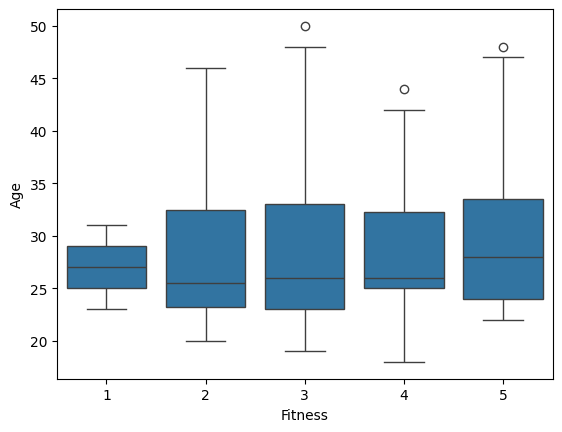

In [9]:
sns.boxplot(x='Fitness',y='Age', data=data)

<Axes: xlabel='Fitness', ylabel='Miles'>

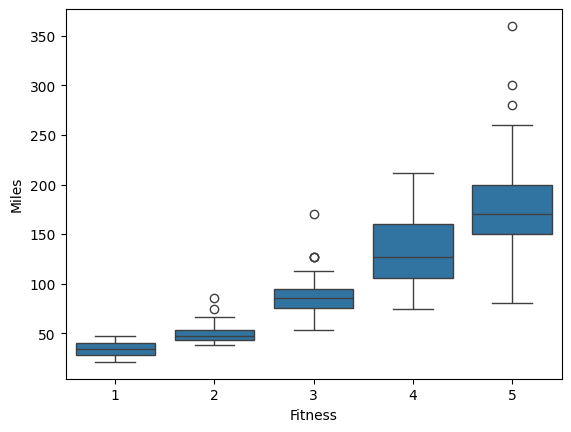

In [10]:
sns.boxplot(x='Fitness',y='Miles', data=data)

In [11]:
num_columns=data.select_dtypes(exclude='object')

<Axes: >

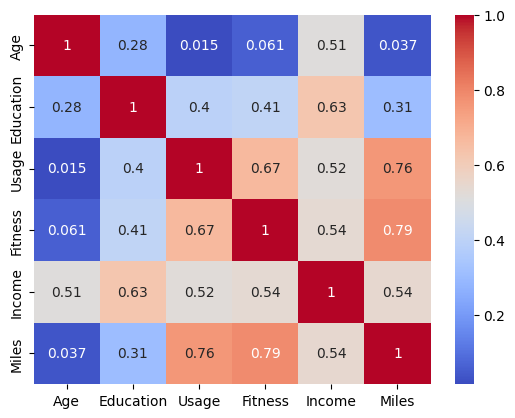

In [12]:
sns.heatmap(num_columns.corr(),annot=True, cmap='coolwarm')

<Axes: ylabel='Income'>

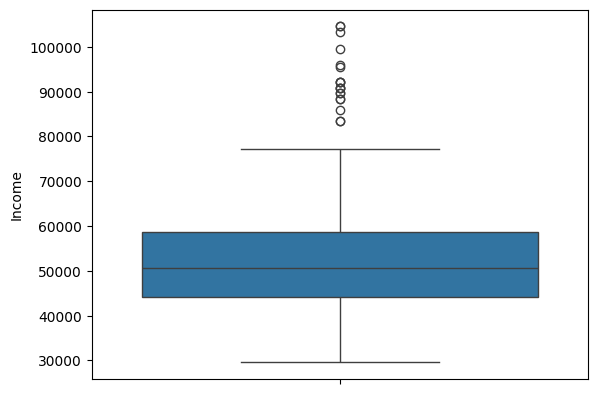

In [13]:
sns.boxplot(y='Income', data=data)

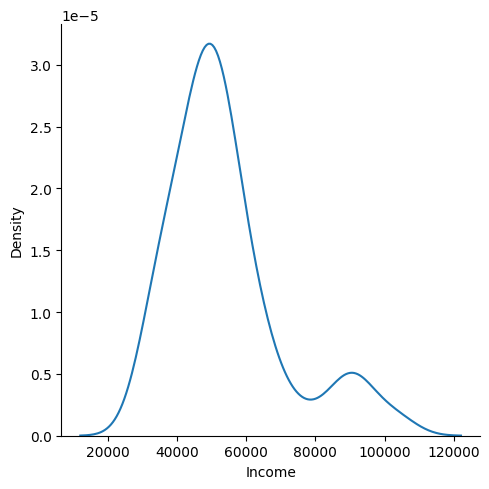

In [14]:
sns.displot(data, x='Income', kind='kde')

<Axes: xlabel='Product', ylabel='Age'>

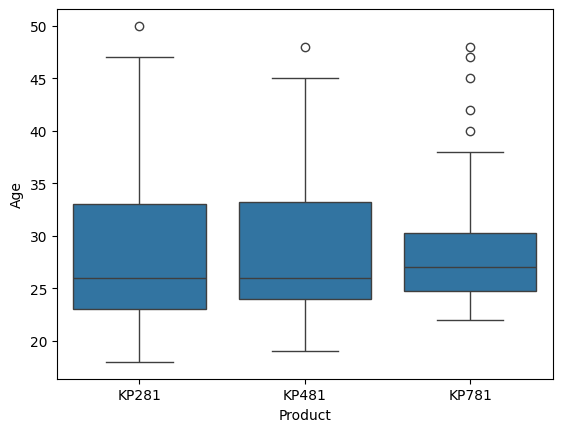

In [15]:
sns.boxplot(x='Product',y='Age', data=data)

In [16]:
data['ProductLevel'] = data['Product'].map({'KP281': 0, 'KP481': 1, 'KP781':2})

In [17]:
data['ProductLevel'].corr(data['Fitness'])

np.float64(0.5948832140406107)

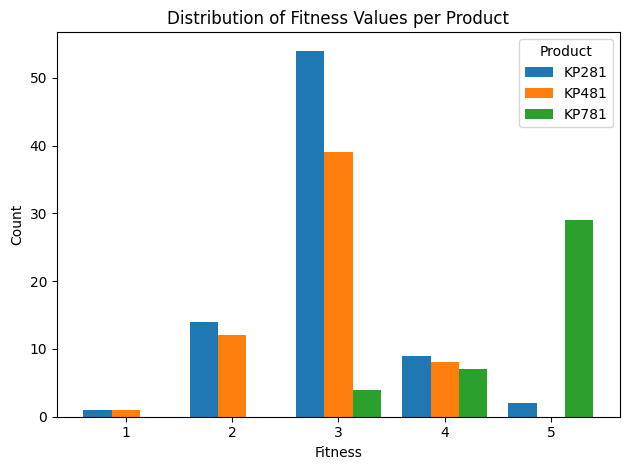

In [18]:
data = data
# Create a frequency table: rows = fitness values, columns = products
counts = pd.crosstab(data['Fitness'], data['Product'])

# Plot as grouped bar plot
counts.plot(kind='bar', width=0.8)
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.title('Distribution of Fitness Values per Product')
plt.xticks(rotation=0)
plt.legend(title='Product')
plt.tight_layout()
plt.show()


In [19]:
data=pd.read_csv('aerofit_treadmill.txt')

In [20]:
data['Product']

0      KP281
1      KP281
2      KP281
3      KP281
4      KP281
       ...  
175    KP781
176    KP781
177    KP781
178    KP781
179    KP781
Name: Product, Length: 180, dtype: object

In [21]:
data['AgeGroups']=pd.cut(data['Age'], bins=range(18,50,5), right=False)

In [22]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='g',ax=ax[rows][0])
        
        sns.distplot(df[var],color='g',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1

    plt.show()

In [23]:
data_281=data.query("Product == 'KP281'")
data_481=data.query("Product == 'KP481'")
data_781=data.query("Product == 'KP781'")

In [24]:
data_781['Income'].quantile(0.5)

np.float64(76568.5)

In [25]:
data_prod=[data_281,data_481,data_781]

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde(df, colname, nrows=1, mcols=3, width=15,height=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=mcols, figsize=(width, height))
   # fig.set_facecolor("lightgrey")
    colors = ['skyblue', 'lightgreen', 'salmon'] 
    # Flatten axes array for easy indexing
    ax = ax.flatten()
    fig.suptitle(f'KDE for {colname}', fontsize=26, fontweight='bold')

    for i,prod in enumerate(df):
        ax[i].set_title(f"Customers who bought {prod['Product'].iloc[0]}", fontweight="bold", fontsize=10)
        sns.kdeplot(df[i][colname], ax=ax[i], color=colors[i], fill=True, alpha=0.4)
        ax[i].axvline(df[i][colname].mean(), color='r', linestyle='--', label="Mean")
        ax[i].axvline(df[i][colname].median(), color='g', linestyle='-', label="Median")
        ax[i].axvline(df[i][colname].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[i].legend()

    plt.tight_layout()
    plt.show()


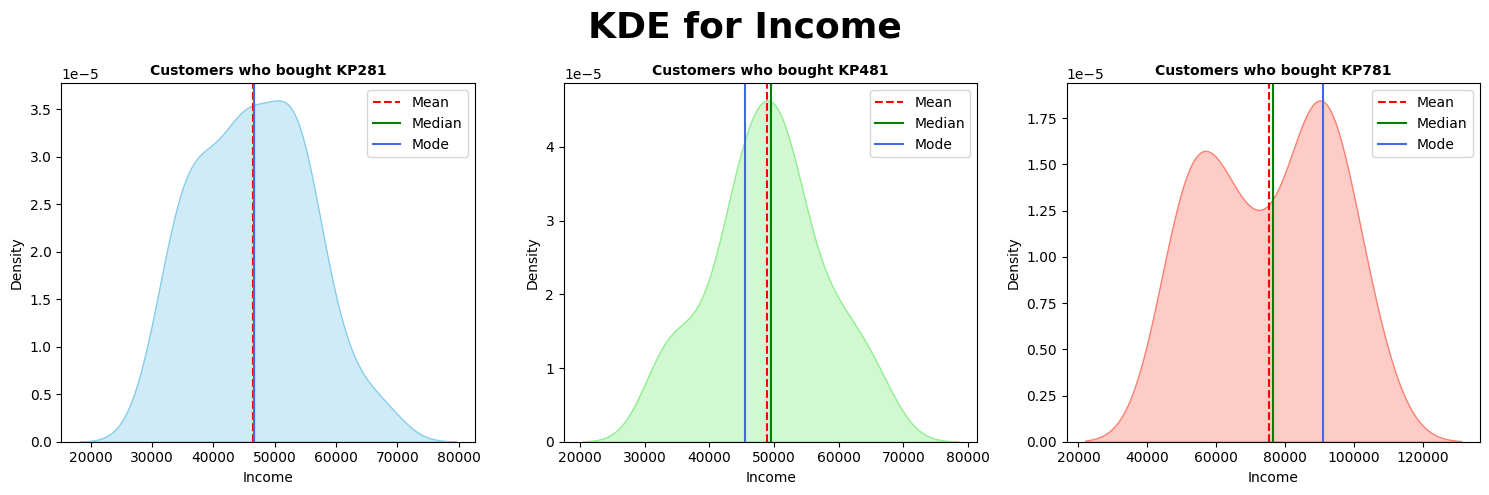

In [27]:
plot_kde(data_prod, 'Income')

## The 781 has a bimodal distribution. Evidently customers in two income ranges, one low, 40-60k and the other high, 80-100k are both showing nearly the same interest in this product - even though it is the most expensive(the prices are 1500$, 1750$ and 2500$ respectively). What draws the 40-60k customer base to 781?

## - Lets compare the area under the curve for 40-60k customers

In [28]:
from scipy.stats import gaussian_kde
from scipy.integrate import simpson
import numpy as np

def kde_area(data, lower=40000, upper=60000, bandwidth=None):
    # Drop NaNs
    data = data.dropna()

    # Fit KDE
    kde = gaussian_kde(data, bw_method=bandwidth)

    # Create fine grid of x-values
    x_grid = np.linspace(lower, upper, 1000)
    y_vals = kde(x_grid)

    # Integrate using Simpson's Rule
    area = simpson(y_vals, x=x_grid)

    return area

area_281 = kde_area(data_281['Income'])
area_481 = kde_area(data_481['Income'])
area_781 = kde_area(data_781['Income'])

print(f"Proportion in 40k–60k range:")
print(f"KP281: {area_281:.3f}")
print(f"KP481: {area_481:.3f}")
print(f"KP781: {area_781:.3f}")


Proportion in 40k–60k range:
KP281: 0.633
KP481: 0.700
KP781: 0.248


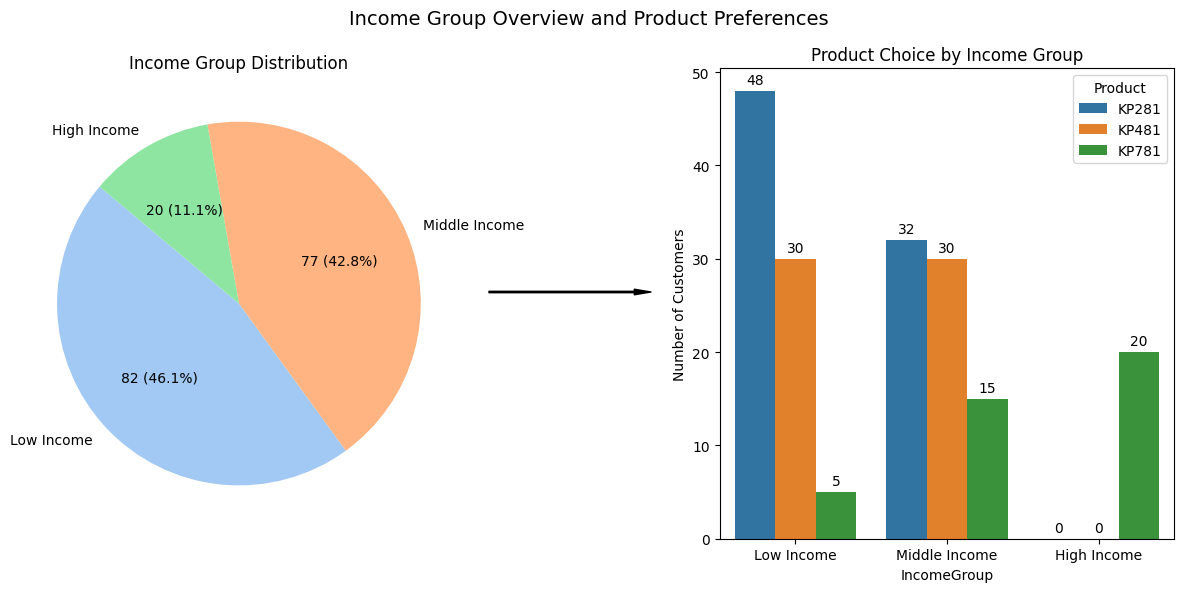

In [29]:
bins = [0, 50000, 76000, float('inf')]
labels = ['Low Income', 'Middle Income', 'High Income']

data['IncomeGroup'] = pd.cut(data['Income'], bins=bins, labels=labels, right=False)
data['IncomeGroup'].value_counts()
df=data

# 1. Create the contingency table
counts = pd.crosstab(df['IncomeGroup'], df['Product'])

# 2. Reset index and melt to long format
counts = counts.reset_index().melt(id_vars='IncomeGroup', var_name='Product', value_name='Count')

# Set up a larger figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle('Income Group Overview and Product Preferences', fontsize=14)

# -------------------------
# 1. PIE CHART: IncomeGroup distribution
# -------------------------
income_counts = df['IncomeGroup'].value_counts().sort_index()
colors = sns.color_palette("pastel")
total = income_counts.sum()

# Custom function to format as: "count (percent%)"
def format_label(pct):
    count = int(pct * total / 100)
    return f'{count} ({pct:.1f}%)'

ax1.pie(income_counts, labels=income_counts.index, autopct=format_label,startangle=140, colors=colors)
ax1.set_title('Income Group Distribution')

# -------------------------
# 2. GROUPED BAR PLOT: Product vs IncomeGroup
# -------------------------
bar_ax = sns.barplot(data=counts, x='IncomeGroup', y='Count', hue='Product', ax=ax2)

# Add data labels
for container in bar_ax.containers:
    bar_ax.bar_label(container, padding=3)

ax2.set_title('Product Choice by Income Group')
ax2.set_ylabel('Number of Customers')

# -------------------------
# 3. Draw an arrow from pie to bar
# -------------------------
plt.annotate('', xy=(0.55, 0.5), xytext=(0.4, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4),
             xycoords='figure fraction')

plt.tight_layout()
plt.show()



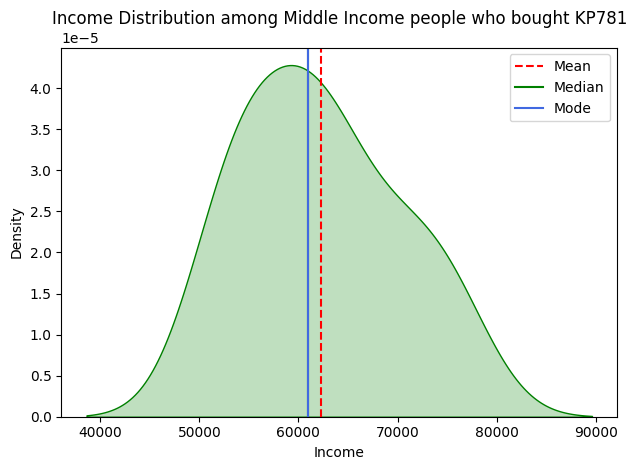

In [30]:
middle_781=data.query(("Product=='KP781' and IncomeGroup =='Middle Income'"))
fig, ax = plt.subplots()
sns.kdeplot(data=middle_781,ax=ax, x='Income', fill=True, color='green')
plt.title('Income Distribution among Middle Income people who bought KP781')
ax.axvline(middle_781['Income'].mean(), color='r', linestyle='--', label="Mean")
ax.axvline(middle_781['Income'].median(), color='g', linestyle='-', label="Median")
ax.axvline(middle_781['Income'].mode()[0], color='royalblue', linestyle='-', label="Mode")
ax.legend()
plt.tight_layout()

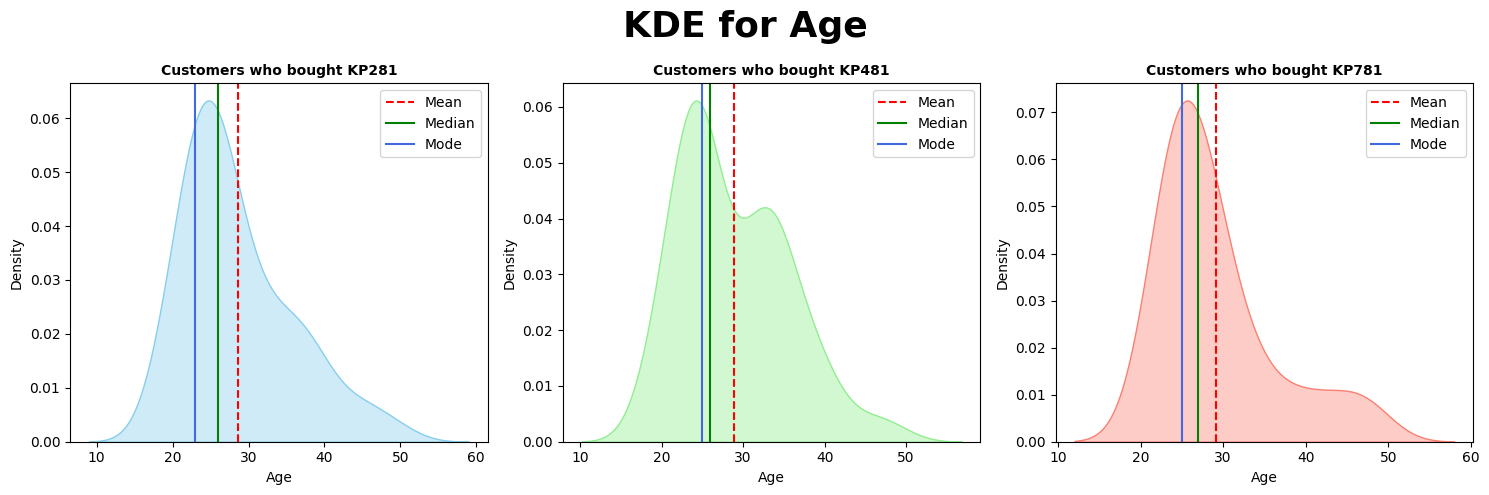

In [31]:
plot_kde(data_prod, 'Age')

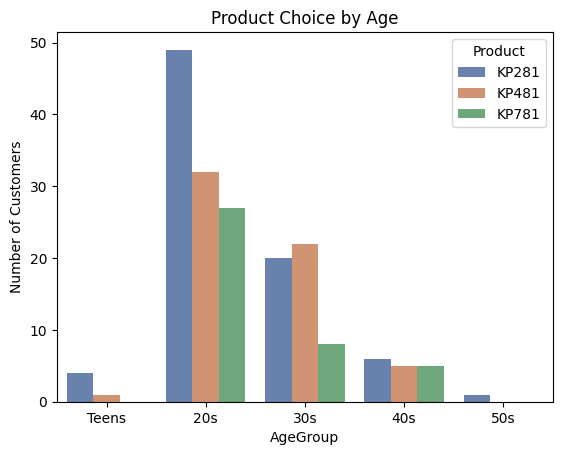

In [32]:
bins = [10,20,30,40,50,60]
labels = ['Teens', '20s', '30s','40s','50s']

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data['AgeGroup'].value_counts()
df=data

# 1. Create the contingency table
counts = pd.crosstab(df['AgeGroup'], df['Product'])

# 2. Reset index and melt to long format
counts = counts.reset_index().melt(id_vars='AgeGroup', var_name='Product', value_name='Count')

# 3. Plot as grouped bar chart
sns.barplot(data=counts, x='AgeGroup', y='Count', hue='Product',palette='deep', alpha=0.9)

#sns.lineplot(data=data, x='AgeGroup', y='IncomeGroup')
plt.title('Product Choice by Age')
plt.ylabel('Number of Customers')
plt.show()


## Is it possible to do cluster analysis to identify hints of market segmentation? Lets plot a few scatter plots to test...

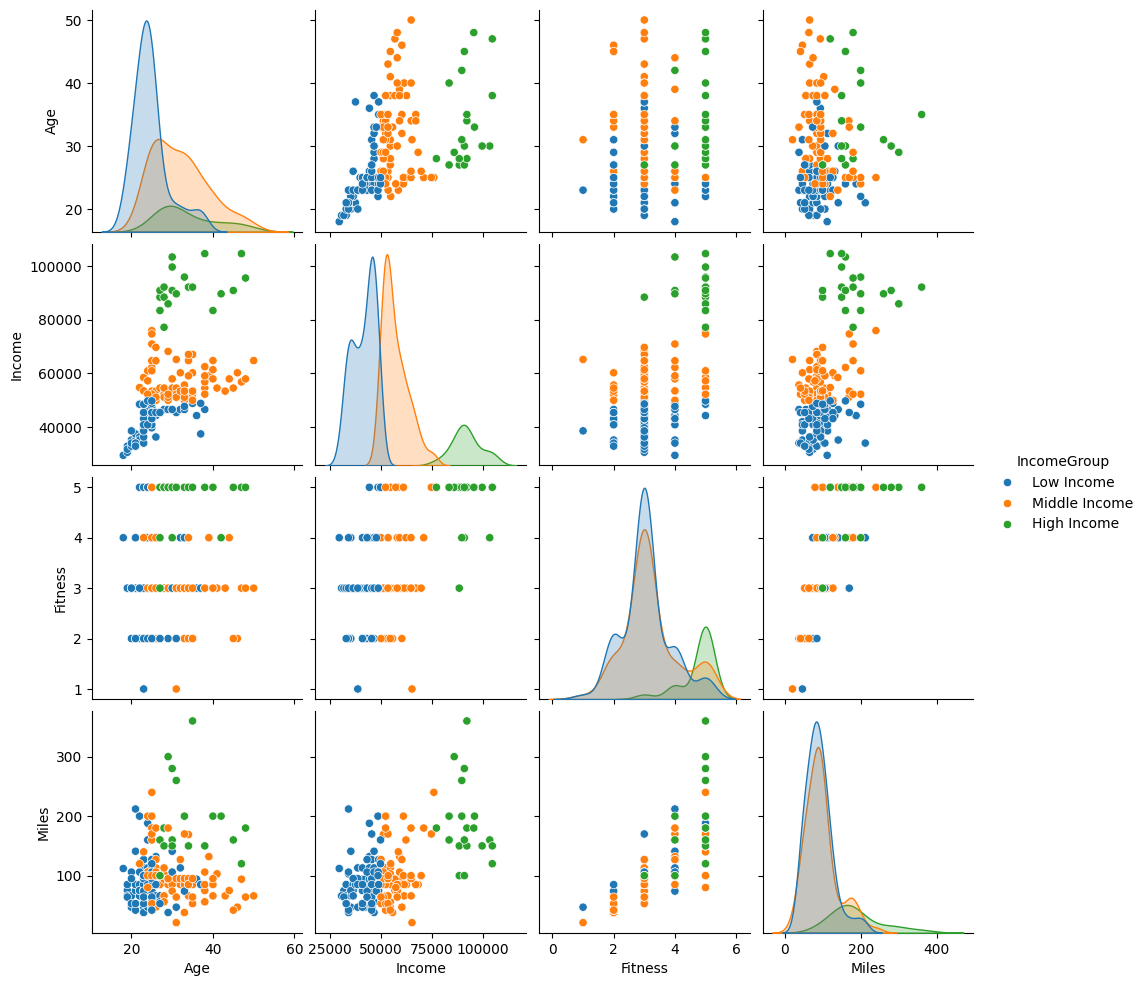

In [34]:
sns.pairplot(data, hue='IncomeGroup', vars=['Age', 'Income', 'Fitness', 'Miles'], height=2.5)
plt.show()

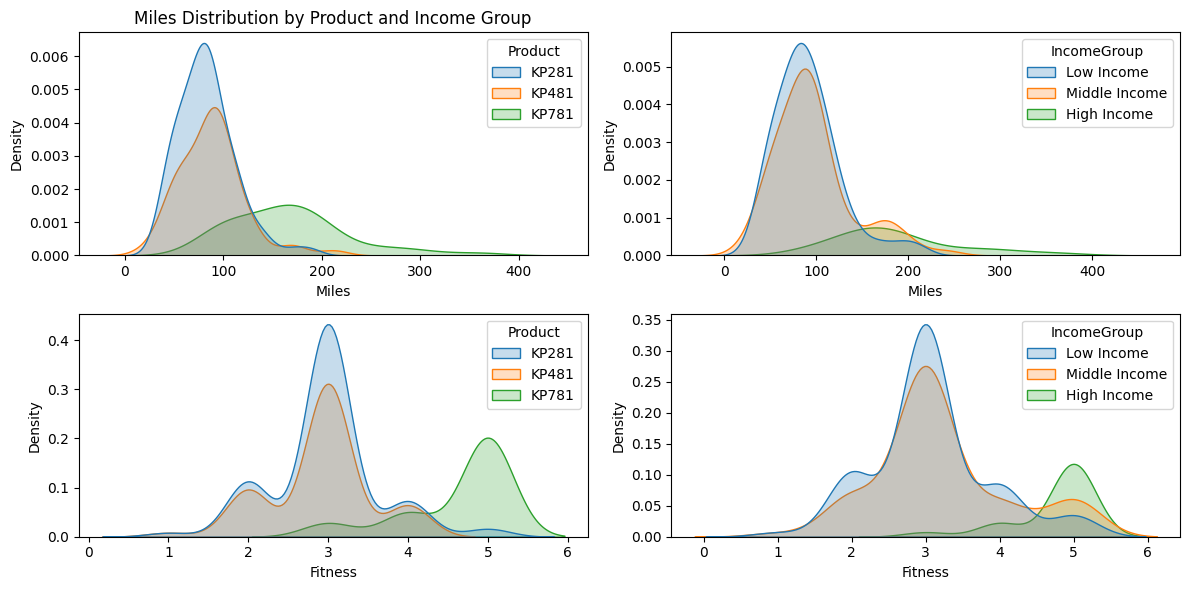

In [44]:
fig, ax = plt.subplots(2,2, figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Miles Distribution by Product and Income Group')
sns.kdeplot(data=data, x='Miles', hue='Product', fill=True, color='green')
plt.subplot(2, 2, 2)
sns.kdeplot(data=data, x='Miles', hue='IncomeGroup', fill=True, color='blue')
plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='Fitness', hue='Product', fill=True, color='orange')
plt.subplot(2, 2, 4)
sns.kdeplot(data=data, x='Fitness', hue='IncomeGroup', fill=True, color='purple')
plt.tight_layout()


### From the above plots, we can see that the section of the middle income group who bought the KP781 model, tend to have high fitness and high mileage in general. We can use this fact to persuade middel income customers with strong fitness goals to buy the KP781 instead of 481 or 281!